<a href="https://colab.research.google.com/github/rahlgpta/Forrest-Fire-Detection/blob/main/Forrest_Fire_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import zipfile
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
zip_file_path = '/content/drive/MyDrive/Dataset.zip'

In [4]:
extracted_path = '/content/dataset/'

In [5]:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

In [6]:
train_data_dir = os.path.join(extracted_path, 'Forest Fire Dataset', 'Training')
test_data_dir = os.path.join(extracted_path, 'Forest Fire Dataset', 'Testing')

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

some images in provided dataset are in 250x250 while others are in 256x256

In [8]:
batch_size = 32
img_height, img_width = 250, 250

In [9]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [10]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'  # Binary classification
)

Found 1520 images belonging to 2 classes.


In [11]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu',padding='valid'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu',padding='valid'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

num_epochs = 10
history = model.fit(train_generator, epochs=num_epochs)


Epoch 1/10
48/48 [==============================] - 18s 109ms/step - loss: 0.3907 - accuracy: 0.8553
Epoch 2/10
48/48 [==============================] - 5s 105ms/step - loss: 0.1730 - accuracy: 0.9408
Epoch 3/10
48/48 [==============================] - 5s 110ms/step - loss: 0.1352 - accuracy: 0.9553
Epoch 4/10
48/48 [==============================] - 7s 136ms/step - loss: 0.1424 - accuracy: 0.9480
Epoch 5/10
48/48 [==============================] - 5s 100ms/step - loss: 0.0864 - accuracy: 0.9704
Epoch 6/10
48/48 [==============================] - 5s 106ms/step - loss: 0.0677 - accuracy: 0.9809
Epoch 7/10
48/48 [==============================] - 5s 109ms/step - loss: 0.0868 - accuracy: 0.9750
Epoch 8/10
48/48 [==============================] - 6s 125ms/step - loss: 0.0561 - accuracy: 0.9809
Epoch 9/10
48/48 [==============================] - 5s 99ms/step - loss: 0.0529 - accuracy: 0.9836
Epoch 10/10
48/48 [==============================] - 6s 120ms/step - loss: 0.0425 - accuracy: 0.9875

In [30]:
model.save('/content/drive/MyDrive/forest_fire_classifier.h5')


In [31]:
model = tf.keras.models.load_model('/content/drive/MyDrive/forest_fire_classifier.h5')


In [32]:
test_image_paths = [os.path.join(test_data_dir, img) for img in os.listdir(test_data_dir)]


In [33]:
test_images = []
for img_path in test_image_paths:
    img = load_img(img_path, target_size=(img_height, img_width))
    img = img_to_array(img) / 255.0  # Normalize pixel values
    test_images.append(img)

In [34]:
test_images = np.array(test_images)
test_predictions = model.predict(test_images)

12/12 [==============================] - 1s 30ms/step


In [35]:
for i in range(len(test_predictions)):
    predicted_label = "Non-Fire" if test_predictions[i] > 0.5 else "Fire"
    confidence = test_predictions[i][0] if predicted_label == "Non-Fire" else 1 - test_predictions[i][0]
    print(f"Image: {test_image_paths[i]}, Predicted Label: {predicted_label}, Confidence: {confidence}")

Image: /content/dataset/Forest Fire Dataset/Testing/nofire_0711.jpg, Predicted Label: Non-Fire, Confidence: 0.9994221925735474
Image: /content/dataset/Forest Fire Dataset/Testing/nofire_0948.jpg, Predicted Label: Non-Fire, Confidence: 0.9999711513519287
Image: /content/dataset/Forest Fire Dataset/Testing/fire_0569.jpg, Predicted Label: Fire, Confidence: 0.9999998908453875
Image: /content/dataset/Forest Fire Dataset/Testing/fire_0253.jpg, Predicted Label: Fire, Confidence: 0.9984926583711058
Image: /content/dataset/Forest Fire Dataset/Testing/fire_0593.jpg, Predicted Label: Fire, Confidence: 0.9998318140715128
Image: /content/dataset/Forest Fire Dataset/Testing/fire_0563.jpg, Predicted Label: Fire, Confidence: 0.9997412543161772
Image: /content/dataset/Forest Fire Dataset/Testing/nofire_0167.jpg, Predicted Label: Non-Fire, Confidence: 0.999840497970581
Image: /content/dataset/Forest Fire Dataset/Testing/nofire_0281.jpg, Predicted Label: Non-Fire, Confidence: 0.9989950060844421
Image: /c

In [39]:
random_index = random.randint(0, len(test_image_paths) - 1)
random_image = load_img(test_image_paths[random_index], target_size=(img_height, img_width))
random_image_array = img_to_array(random_image) / 255.0

In [40]:
random_prediction = model.predict(np.expand_dims(random_image_array, axis=0))
predicted_label = "Non-Fire" if random_prediction > 0.5 else "Fire"
confidence = random_prediction[0][0] if predicted_label == "Non-Fire" else 1 - random_prediction[0][0]


1/1 [==============================] - 0s 29ms/step


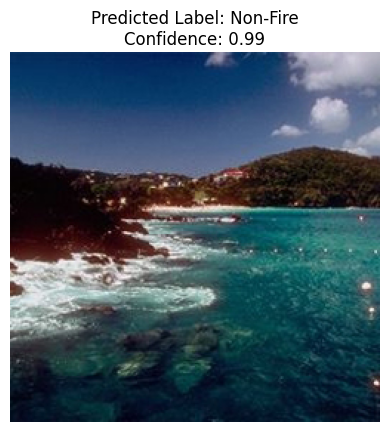

In [41]:
plt.imshow(random_image)
plt.title(f"Predicted Label: {predicted_label}\nConfidence: {confidence:.2f}")
plt.axis('off')
plt.show()